In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import LineString, LinearRing, MultiLineString

In [150]:
# load data and crs
coor = pd.read_csv('station_coordinate.csv')
coor_geo = gpd.GeoDataFrame(coor, geometry=gpd.points_from_xy(coor['lng'], coor['lat']))
coor_geo.crs = {'init':'epsg:4326'}

/home/yejoon/anaconda3/envs/geopandas-env2/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [151]:
# subway no, name, line dataframe

with open('../Subway_base_network/seoul.txt', 'r', encoding = "UTF-8") as file:
    S = file.read().split('\n')
    
subway = {'no':[], 'name':[], 'line':[]}
for i,x in enumerate(S):
    if i == 705: # end of the (no, name, line) pair
        break
    
    no, name, line = x.split()
    subway['no'].append(no)
    subway['name'].append(name)
    subway['line'].append(line)

subway = pd.DataFrame(subway)
subway

,no,name,line
0,100,소요산,1
1,101,동두천,1
2,102,보산,1
3,103,동두천중앙,1
4,104,지행,1
...,...,...,...
700,Y115,초당,Y1
701,Y116,삼가,Y1
702,Y117,시청.용인대,Y1
703,Y118,명지대,Y1


In [152]:
# replace station name
replace_dict = {'서울':'서울역', '총신대입구':'총신대입구(이수)', '이수':'총신대입구(이수)', '가천대':'가천대역', '419민주묘지':'4.19민주묘지'}

coor_geo = coor_geo.replace(replace_dict)

In [5]:
# find the 'no' which corresponds to 'name'

def add_no(coor, subway):
    coor.reset_index(inplace=True)
    subway.reset_index(inplace=True)

    no_list = []
    for i in range(coor.shape[0]):    
        no = subway.loc[subway['name'] == coor['name'][i]]['no']    
        if no.empty: # if 'no' cannot be found, append na        
            no_list.append(pd.NA)    
        else:        
            no_list.append(no.iloc[0])# add column in df
    coor['no'] = no_list

    # sort by no
    coor.sort_values('no', inplace=True)
    coor.reset_index(drop=True, inplace=True)

    return coor

/home/yejoon/anaconda3/envs/geopandas-env2/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
<ipython-input-5-73d564340467>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coor.sort_values('no', inplace=True)


<AxesSubplot:>

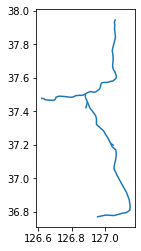

In [6]:
# 1호선(line 1)

## add no
subway_1 = subway.loc[subway['line'] == '1']
coor_1 = coor_geo.loc[coor_geo['line'] == '01호선']

line1 = add_no(coor_1, subway_1)


## divide by line
line1_main = line1.iloc[:62].reset_index(drop=True)
line1_main_p = line1.iloc[[41,62]].reset_index(drop=True)
line1_P = line1.iloc[62:].drop(index=[65,79]).reset_index(drop=True) # 65 for 광명 # 79 for 서동탄
line1_GM = line1.iloc[[64,65]].reset_index(drop=True)
line1_SDT = line1.iloc[[78,79]].reset_index(drop=True)

line1_main = LineString(line1_main['geometry'])
line1_main_p = LineString(line1_main_p['geometry'])
line1_P = LineString(line1_P['geometry'])
line1_GM = LineString(line1_GM['geometry'])
line1_SDT = LineString(line1_SDT['geometry'])

## make geodf
line1_df = gpd.GeoDataFrame({'line':['1','1','1','1','1'], 'geometry':[line1_main, line1_main_p, line1_P, line1_GM, line1_SDT]})

line1_df.plot()

/home/yejoon/anaconda3/envs/geopandas-env2/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
<ipython-input-5-73d564340467>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coor.sort_values('no', inplace=True)


<AxesSubplot:>

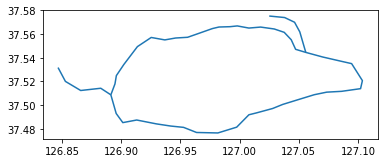

In [18]:
# 2호선 (line 2)

## add no
subway_2 = subway.loc[subway['line'] == '2']
coor_2 = coor_geo.loc[coor_geo['line'] == '02호선']

line2 = add_no(coor_2, subway_2)


## divide by line (or ring for 2호선)
line2_ring = line2.drop(index=[11,12,13,14,38,39,40,41]).reset_index(drop=True)
line2_ssd = line2.iloc[10:15].reset_index(drop=True) # 신설동 지선
line2_kcs = line2.iloc[37:42].reset_index(drop=True) # 까치산 지선

line2_ring = LinearRing(line2_ring['geometry'])
line2_ssd = LineString(line2_ssd['geometry'])
line2_kcs = LineString(line2_kcs['geometry'])

## make geodf
line2_df = gpd.GeoDataFrame({'line':['2','2','2'], 'geometry':[line2_ring, line2_ssd, line2_kcs]})

line2_df.plot()

/home/yejoon/anaconda3/envs/geopandas-env2/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
<ipython-input-5-73d564340467>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coor.sort_values('no', inplace=True)


<AxesSubplot:>

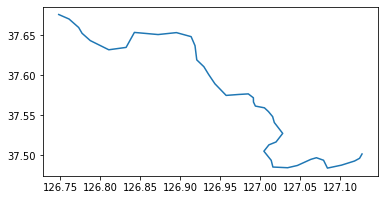

In [63]:
# 3호선
subway_3 = subway.loc[subway['line'] == '3']
coor_3 = coor_geo.loc[coor_geo['line'] == '03호선']

line3 = add_no(coor_3, subway_3)

line3 = LineString(line3['geometry'])

line3_df = gpd.GeoDataFrame({'line':['3'], 'geometry':[line3]})
line3_df.plot()

/home/yejoon/anaconda3/envs/geopandas-env2/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
<ipython-input-5-73d564340467>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coor.sort_values('no', inplace=True)


<AxesSubplot:>

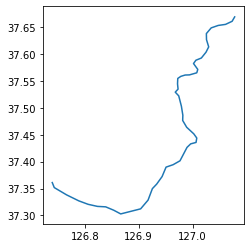

In [62]:
# 4호선
## add no


subway_4 = subway.loc[subway['line'] == '4']
coor_4 = coor_geo.loc[coor_geo['line'] == '04호선']

## divide by line 
line4 = add_no(coor_4, subway_4)

line4 = LineString(line4['geometry'])

## make geodf
line4_df = gpd.GeoDataFrame({'line':['4'], 'geometry':[line4]})
line4_df.plot()

/home/yejoon/anaconda3/envs/geopandas-env2/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
<ipython-input-5-73d564340467>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coor.sort_values('no', inplace=True)


<AxesSubplot:>

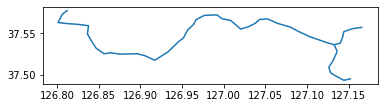

In [9]:
# 5호선
# 강일~하남검단산까지는 좌표가 X
# 양평은 좌표가 경기도 양평(경의중앙선)으로 되어 있음

subway_5 = subway.loc[subway['line'] == '5']
coor_5 = coor_geo.loc[coor_geo['line'] == '05호선']

line5 = add_no(coor_5, subway_5) 

# divide by line
line5_main = line5.iloc[:43].reset_index()
line5_p = line5.iloc[43:50].reset_index()
line5_main_p = line5.iloc[[37,43]].reset_index()

line5_main = LineString(line5_main['geometry'])
line5_p = LineString(line5_p['geometry'])
line5_main_p = LineString(line5_main_p['geometry'])

# geodf
line5_df = gpd.GeoDataFrame({'line':['5','5','5'], 'geometry':[line5_main, line5_main_p, line5_p]})
line5_df.plot()

/home/yejoon/anaconda3/envs/geopandas-env2/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
<ipython-input-5-73d564340467>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coor.sort_values('no', inplace=True)


<AxesSubplot:>

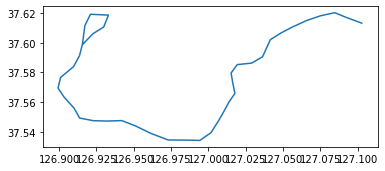

In [10]:
# 6호선
subway_6 = subway.loc[subway['line'] == '6']
coor_6 = coor_geo.loc[coor_geo['line'] == '06호선']

line6 = add_no(coor_6, subway_6)

## divide by line 
line6_ring = line6.iloc[0:6].reset_index()
line6_line = line6.iloc[6:].reset_index()
line6_ring_line = line6.iloc[[0,6]].reset_index()

line6_ring = LinearRing(line6_ring['geometry'])
line6_line = LineString(line6_line['geometry'])
line6_ring_line = LineString(line6_ring_line['geometry'])

## make geodf
line6_df = gpd.GeoDataFrame({'line':['6','6','6'], 'geometry':[line6_ring, line6_line, line6_ring_line]})
line6_df.plot()



/home/yejoon/anaconda3/envs/geopandas-env2/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
<ipython-input-5-73d564340467>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coor.sort_values('no', inplace=True)


<AxesSubplot:>

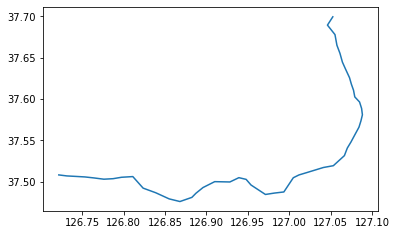

In [61]:
# 7호선
subway_7 = subway.loc[subway['line'] == '7']
coor_7 = coor_geo.loc[coor_geo['line'] == '07호선']

line7 = add_no(coor_7, subway_7)

line7 = LineString(line7['geometry'])

line7_df = gpd.GeoDataFrame({'line':['7'], 'geometry':[line7]})
line7_df.plot()

/home/yejoon/anaconda3/envs/geopandas-env2/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
<ipython-input-5-73d564340467>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coor.sort_values('no', inplace=True)


<AxesSubplot:>

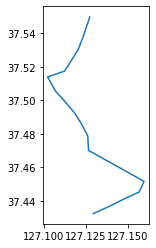

In [60]:
# 8호선
subway_8 = subway.loc[subway['line'] == '8']
coor_8 = coor_geo.loc[coor_geo['line'] == '08호선']

line8 = add_no(coor_8, subway_8)

line8 = LineString(line8['geometry'])

line8_df = gpd.GeoDataFrame({'line':['8'], 'geometry':[line8]})
line8_df.plot()

/home/yejoon/anaconda3/envs/geopandas-env2/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
<ipython-input-5-73d564340467>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coor.sort_values('no', inplace=True)
<ipython-input-12-18f34a61bfda>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

<AxesSubplot:>

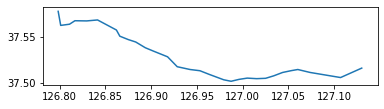

In [12]:
# 9호선
# 9호선 연장 구간 미포함(환승역 제외): 삼전 ~ 중앙보훈병원

subway_9 = subway.loc[subway['line'] == '9']
coor_9 = coor_geo.loc[coor_geo['line'] == '09호선']

line_9 = add_no(coor_9, subway_9)
line_9.dropna(inplace=True, subset=['lat'])
line_9.reset_index(inplace=True)  

line_9 = LineString(line_9['geometry'])

line9_df = gpd.GeoDataFrame({'line':['9'], 'geometry':[line_9]})
line9_df.plot()

/home/yejoon/anaconda3/envs/geopandas-env2/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
<ipython-input-5-73d564340467>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coor.sort_values('no', inplace=True)


<AxesSubplot:>

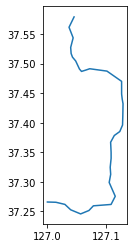

In [58]:
# 분당선
subway_k2 = subway.loc[subway['line'] == 'K2']
coor_k2 = coor_geo.loc[coor_geo['line'] == '분당선']

line_k2 = add_no(coor_k2, subway_k2)

line_k2 = LineString(line_k2['geometry'])

linek2_df = gpd.GeoDataFrame({'line':['K2'], 'geometry':[line_k2]})
linek2_df.plot()

/home/yejoon/anaconda3/envs/geopandas-env2/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
<ipython-input-5-73d564340467>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coor.sort_values('no', inplace=True)


<AxesSubplot:>

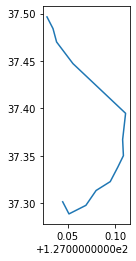

In [59]:
# 신분당선
subway_d = subway.loc[subway['line'] == 'D']
coor_d = coor_geo.loc[coor_geo['line'] == '신분당선']

line_d = add_no(coor_d, subway_d)

line_d = LineString(line_d['geometry'])

lined_df = gpd.GeoDataFrame({'line':['D'], 'geometry':[line_d]})
lined_df.plot()

/home/yejoon/anaconda3/envs/geopandas-env2/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
<ipython-input-5-73d564340467>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coor.sort_values('no', inplace=True)


<AxesSubplot:>

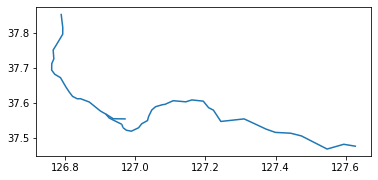

In [14]:
# 경의중앙선
# 양평, 임진강 제외
# 신촌역은 2호선과 겹침

subway_k1 = subway.loc[subway['line'] == 'K1']
coor_k1 = coor_geo.loc[coor_geo['line'] == '경의선']

line_k1 = add_no(coor_k1, subway_k1)

line_k1_yp = line_k1.iloc[:28].reset_index() # 양평 방향)
line_k1_pj = line_k1.iloc[28:52].reset_index() # 파주 방향
line_k1_yp_pj = line_k1.iloc[[0,28]].reset_index() # 용산-효창공원앞
line_k1_seoul = line_k1.iloc[[32,54,52]].reset_index() # 가좌-신촌-서울역

line_k1_yp = LineString(line_k1_yp['geometry'])
line_k1_pj = LineString(line_k1_pj['geometry'])
line_k1_yp_pj = LineString(line_k1_yp_pj['geometry'])
line_k1_seoul = LineString(line_k1_seoul['geometry'])

linek1_df = gpd.GeoDataFrame({'line':['K1','K1','K1','K1'], 'geometry':[line_k1_yp, line_k1_yp_pj, line_k1_pj, line_k1_seoul]})
linek1_df.plot()

/home/yejoon/anaconda3/envs/geopandas-env2/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
<ipython-input-5-73d564340467>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coor.sort_values('no', inplace=True)


<AxesSubplot:>

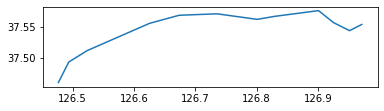

In [15]:
# 공항철도
subway_arex = subway.loc[subway['line'] == 'AREX']
coor_arex = coor_geo.loc[coor_geo['line'] == '공항철도']

line_arex = add_no(coor_arex, subway_arex)

line_arex = line_arex.iloc[:12]

line_arex = LineString(line_arex['geometry'])

linearex_df = gpd.GeoDataFrame({'line':['AREX'], 'geometry':[line_arex]})
linearex_df.plot()

<ipython-input-5-73d564340467>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coor.sort_values('no', inplace=True)


<AxesSubplot:>

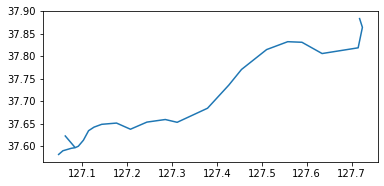

In [126]:
# 경춘선
subway_p1 = subway.loc[subway['line'] == 'P1']
coor_p1 = coor_geo.loc[coor_geo['line'] == '경춘선']

line_p1 = add_no(coor_p1, subway_p1)

line_p1_chrr = line_p1.iloc[:24].reset_index() # 청량리행
line_p1_gwd = line_p1.iloc[[24,3]].reset_index() # 광운대행

line_p1_chrr = LineString(line_p1_chrr['geometry'])
line_p1_gwd = LineString(line_p1_gwd['geometry'])

linep1_df = gpd.GeoDataFrame({'line':['P1','P1'], 'geometry':[line_p1_chrr, line_p1_gwd]})
linep1_df.plot()

/home/yejoon/anaconda3/envs/geopandas-env2/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
<ipython-input-5-73d564340467>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coor.sort_values('no', inplace=True)


<AxesSubplot:>

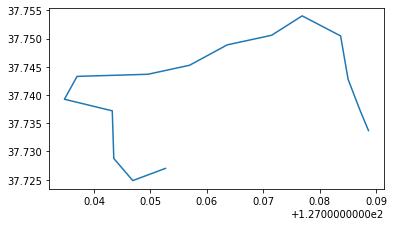

In [131]:
# 의정부경전철
subway_u1 = subway.loc[subway['line'] == 'U1']
coor_u1 = coor_geo.loc[coor_geo['line'] == '의정부경전철']

line_u1 = add_no(coor_u1, subway_u1)

line_u1 = LineString(line_u1['geometry'])

lineu1_df = gpd.GeoDataFrame({'line':['U1'], 'geometry':[line_u1]})
lineu1_df.plot()

/home/yejoon/anaconda3/envs/geopandas-env2/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
<ipython-input-5-73d564340467>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coor.sort_values('no', inplace=True)


<AxesSubplot:>

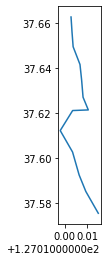

In [155]:
# 우이신설
subway_s1 = subway.loc[subway['line'] == 'S1']
coor_s1 = coor_geo.loc[coor_geo['line'] == '우이신설경전철']

line_s1 = add_no(coor_s1, subway_s1)

line_s1 = LineString(line_s1['geometry'])

lines1_df = gpd.GeoDataFrame({'line':['S1'], 'geometry':[line_s1]})
lines1_df.plot()

In [168]:
# color palette for lines
from matplotlib.colors import hex2color, ListedColormap

# order: 1 2 3 4 5 6 7 8 9 K2(분당선) D(신분당선) K1(경의중앙선) AREX(공항철도) P1(경춘선) U1(의정부경전철) S1(우이신설경전철)
cmaps_hex = ['#0052A4', '#009D3E', '#EF7C1C', '#00A5DE', '#996CAC', '#CD7C2F', '#747F00', '#EA545D', '#BB8336', '#F5A200', '#D4003B', '#77C4A3', '#0090D2', '#0C8E72', '#FDA600', '#B0CE18']

# cmap for matpotlib; each element corresponds to each line
cmaps = [ListedColormap(hex2color(x)) for x in cmaps_hex]

print(len(cmaps))

16


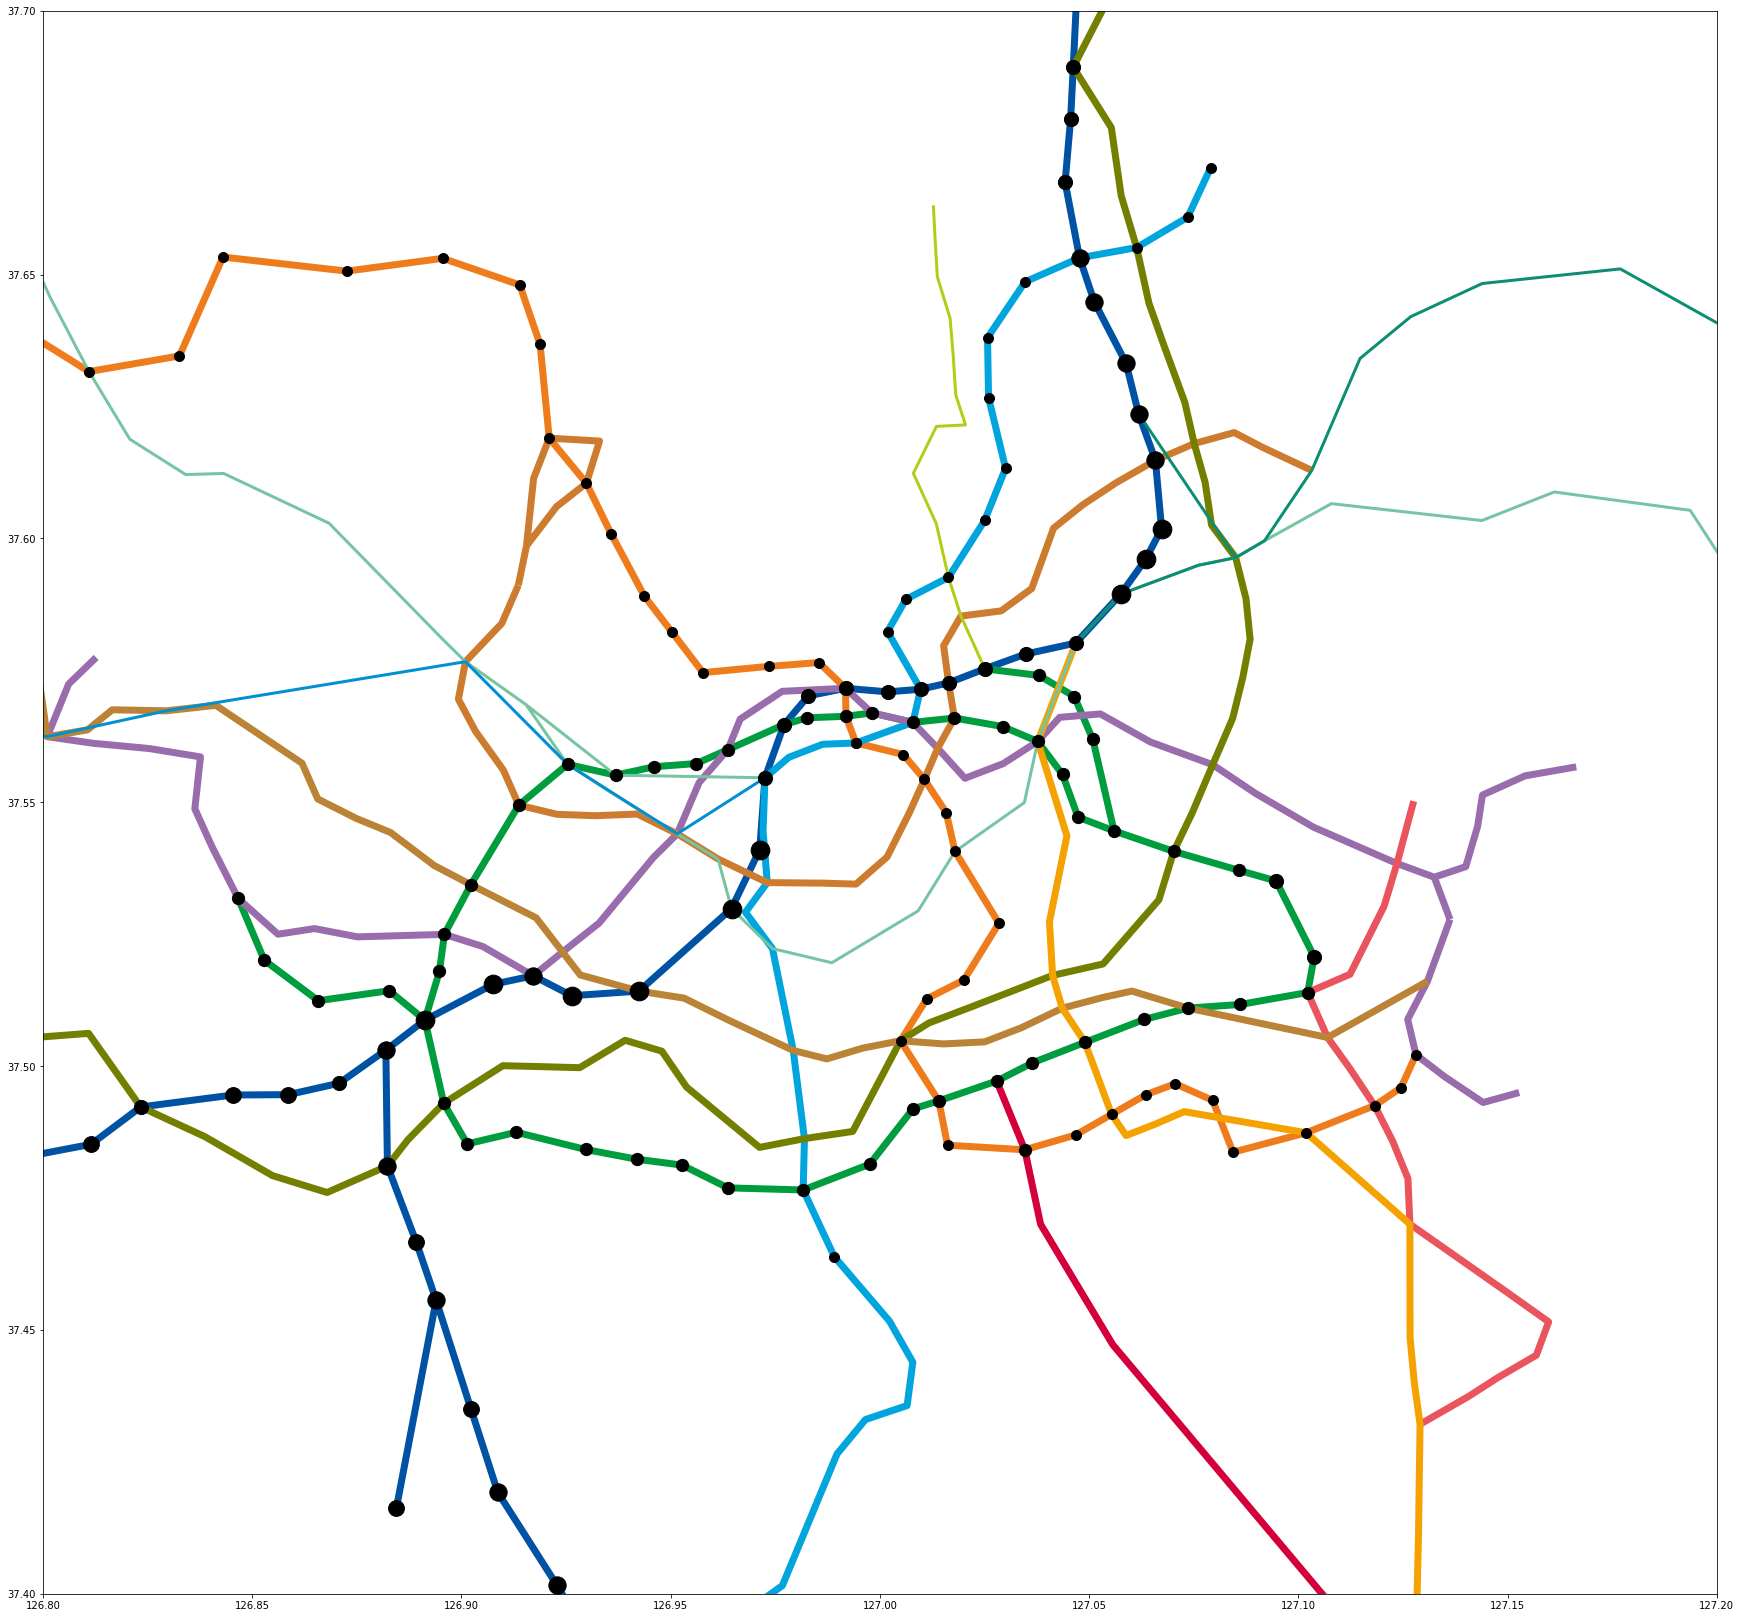

In [200]:
# plot

## canvas
fig, ax = plt.subplots(figsize=(30,30))

## lines
lines = (line1_df, line2_df, line3_df, line4_df, line5_df, line6_df, line7_df, line8_df, line9_df, linek2_df, lined_df, linek1_df, linearex_df, linep1_df, lineu1_df, lines1_df)

for i in range(len(lines)):
    if i in [11, 12, 13, 14, 15]: # 경전철
        linewidth = 3
    else: # 일반 전철
        linewidth = 7

    # plot
    lines[i].plot(ax=ax, linewidth=linewidth, cmap=cmaps[i], zorder=1)

## points (differ markersize by potential)
coor_geo.iloc[:10].plot(ax=ax, markersize=350, color='black', zorder=2)
coor_geo.iloc[10:30].plot(ax=ax, markersize=300, color='black', zorder=2)
coor_geo.iloc[30:60].plot(ax=ax, markersize=250, color='black', zorder=2)
coor_geo.iloc[60:100].plot(ax=ax, markersize=200, color='black', zorder=2)
coor_geo.iloc[100:150].plot(ax=ax, markersize=150, color='black', zorder=2)
coor_geo.iloc[150:210].plot(ax=ax, markersize=100, color='black', zorder=2)

## crop
crop = True
if crop:
    ax.set_xlim(126.8, 127.2)
    ax.set_ylim(37.4, 37.7)